## Inteligencia Artificial
### Árboles de decisión dataset COVID19
#### Nombre del docente: José Gabriel Rodríguez Rivas
#### Nombre del alumno: Laura Yesenia Alacón Garvalena

In [7]:
#import pandas
import pandas as pd

#create a pandas dataframe 
training = pd.read_csv('200723COVID19MEXICO.csv',  encoding= 'unicode_escape')

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  879608 non-null  object
 1   ID_REGISTRO          879608 non-null  object
 2   ORIGEN               879608 non-null  int64 
 3   SECTOR               879608 non-null  int64 
 4   ENTIDAD_UM           879608 non-null  int64 
 5   SEXO                 879608 non-null  int64 
 6   ENTIDAD_NAC          879608 non-null  int64 
 7   ENTIDAD_RES          879608 non-null  int64 
 8   MUNICIPIO_RES        879608 non-null  int64 
 9   TIPO_PACIENTE        879608 non-null  int64 
 10  FECHA_INGRESO        879608 non-null  object
 11  FECHA_SINTOMAS       879608 non-null  object
 12  FECHA_DEF            879608 non-null  object
 13  INTUBADO             879608 non-null  int64 
 14  NEUMONIA             879608 non-null  int64 
 15  EDAD                 879608 non-nu

In [9]:
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2


In [10]:
training["Vive"] = training["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


In [13]:
y_target = training["Vive"].values

In [15]:
columns = ["SEXO", "INTUBADO", "NEUMONIA","EDAD", "EMBARAZO", "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO", "UCI"]
x_input = training[list(columns)].values

In [23]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(x_input, y_target)

In [24]:
clf_train.score(x_input, y_target)

0.9381531318496421

In [25]:
clasificacion = ["VIVO","MUERTO"]

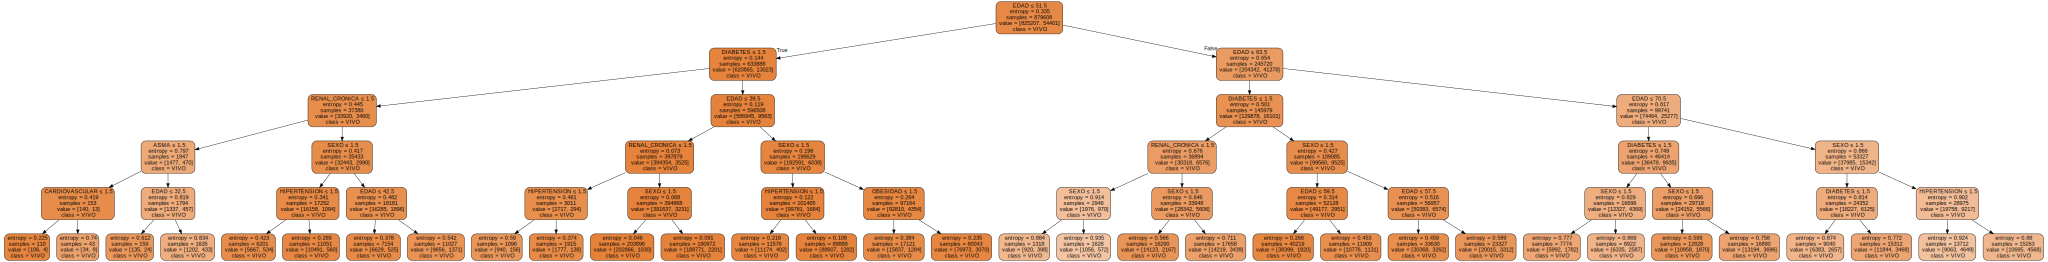

In [26]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file = None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("COVID", format = 'png')
graph

### Análisis sin las variables UCI, INTUBADO Y NEUMONÍA

In [29]:
columns = ["SEXO","EDAD", "EMBARAZO", "DIABETES", "EPOC", "ASMA", "INMUSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO"]
x_input = training[list(columns)].values

In [30]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(x_input, y_target)

In [31]:
clf_train.score(x_input, y_target)

0.9381531318496421

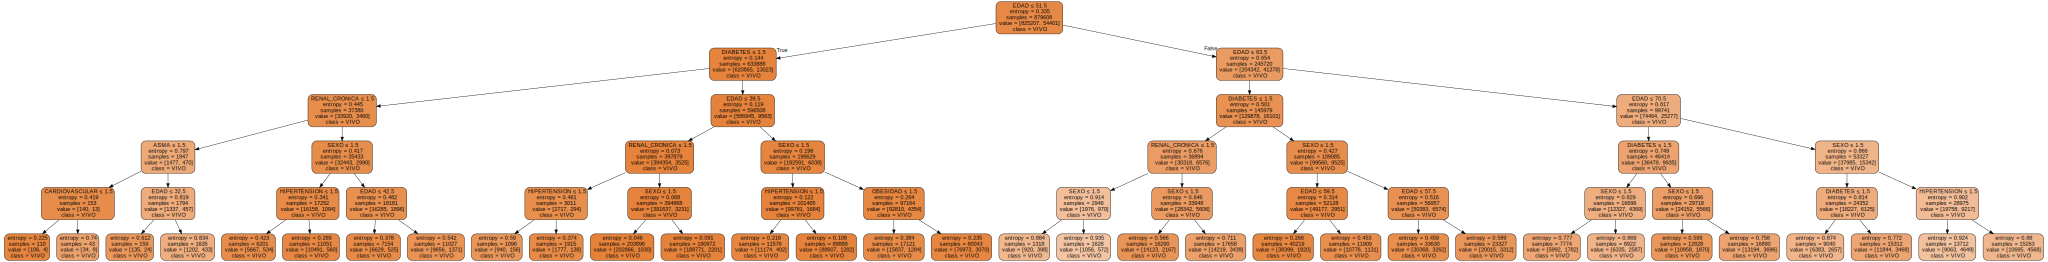

In [32]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file = None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("COVID", format = 'png')
graph